<a href="https://colab.research.google.com/github/katduecker/dnn_osci/blob/main/Thesis_ch3_two_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
rm -r dnn_osci     # delete old version in drive

rm: cannot remove 'dnn_osci': No such file or directory


In [ ]:
!git clone https://github.com/katduecker/dnn_osci
%cd dnn_osci
%cd aet_pytorch/

Cloning into 'dnn_osci'...
remote: Enumerating objects: 525, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 525 (delta 62), reused 28 (delta 15), pack-reused 413
Receiving objects: 100% (525/525), 50.36 MiB | 19.12 MiB/s, done.
Resolving deltas: 100% (280/280), done.
/content/dnn_osci
/content/dnn_osci/aet_pytorch


In [ ]:
# AETZ model replication using pytorch

import torch
from torch import nn
import numpy as np


import aet_net_2lay
import aet_dyn
# get CUDA index
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# colours for plot
col = mcolors.TABLEAU_COLORS

from itertools import combinations


plt.rcParams["figure.figsize"] = (18,3)

font = {'weight' : 'normal',
        'size'   : 14,
        'family' : 'sans-serif'}
plt.rc('font',**font)


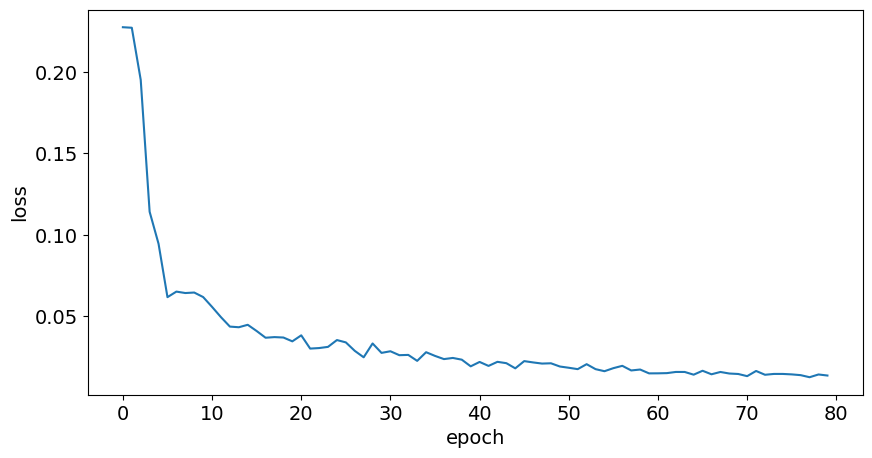

In [ ]:
nn_dim_ = [28,68,24,3]   # [quadrant size, number of hidden nodes, number of output nodes]
eta_ = 1e-3           # learning rate
mini_sz_ = 1          # mini batch size (1 = use SGD)
num_epo_ = 80

beta_ = 0
p_ = .02              # has to be != 0 even if not used
kl_reg_ = [beta_,p_,1]#[0,0.001] # sparsity constraint parameters (not used for manual model)
sig_param =[[2, -2.5, False],[2, -2.5, False]] # sigmoid slope and shift in x direction

ortho_lmbda = .1
ortho_layer = 2

# loss function & final layer activation (for binary crossentropy use sigmoid)
lossfun = [nn.MSELoss(), nn.Softmax(dim=-1)]

params = nn_dim_,eta_,mini_sz_,num_epo_,kl_reg_,sig_param,ortho_lmbda,ortho_layer

# initialize model and weights
model = aet_net_2lay.net(params,lossfun)
model = aet_net_2lay.init_params(model,weight_init='uni')

optimizer = torch.optim.Adam(model.parameters(),lr=eta_)

model.to(DEVICE)
loss_hist = model.train(optimizer,noise=False,print_loss=False)


plt.rcParams["figure.figsize"] = (10,5)
plt.plot(np.arange(model.num_ep),loss_hist.cpu().detach().numpy());
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [ ]:
Z,H1,H2,O = model.forw_conv(x_train)

torch.max(Z)

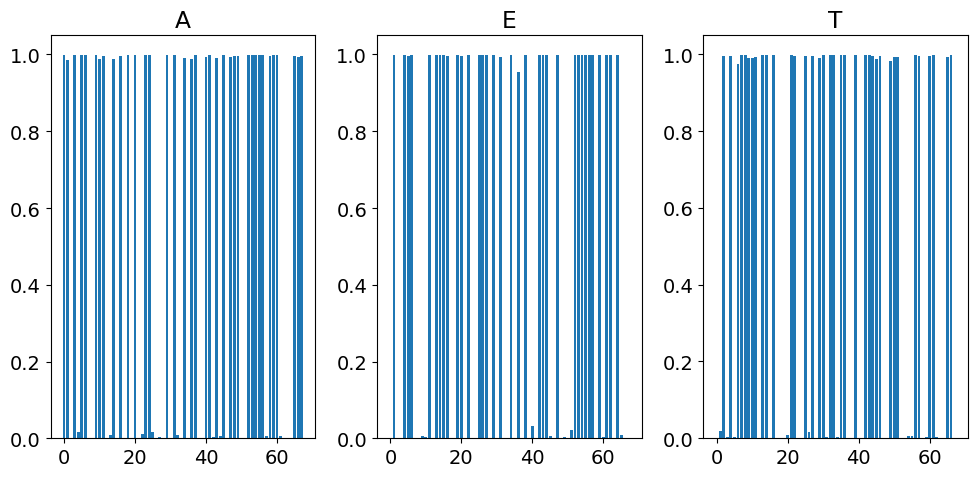

In [ ]:
idx = np.array((0,4,8))
label = ['A','E','T']
fig, axs = plt.subplots(1,3)
for i,ii in enumerate(idx):
  axs[i].bar(np.arange(nn_dim_[1]),H1[ii].detach().cpu().numpy())
  axs[i].set_title(label[i])


fig.tight_layout()

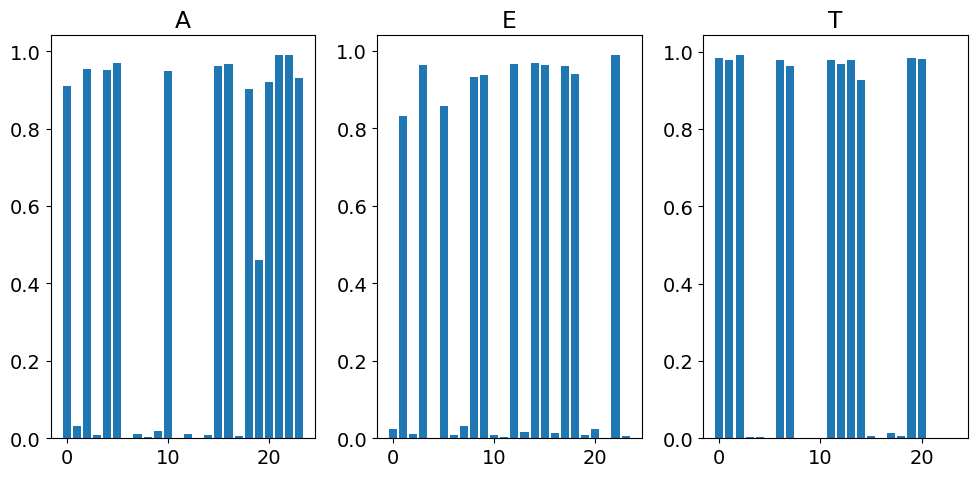

In [ ]:
idx = np.array((0,4,8))
label = ['A','E','T']
fig, axs = plt.subplots(1,3)
for i,ii in enumerate(idx):
  axs[i].bar(np.arange(nn_dim_[2]),H2[ii].detach().cpu().numpy())
  axs[i].set_title(label[i])


fig.tight_layout()